# Niche-differential expression analysis using `nicheDE`

In [1]:
set.seed(20240709)

library(spacexr)
library(nicheDE)
library(MCube)
library(ggplot2)

max_cores <- 36

In [2]:
DATA_PATH <- "/import/home/share/zw/pql/data/breast_cancer"
RESULT_PATH <- "/import/home/share/zw/pql/results/breast_cancer"

if (!dir.exists(RESULT_PATH)) {
    dir.create(RESULT_PATH, recursive = TRUE)
}

## Applying `RCTD` and `nicheDE` to the ST dataset segmented by `UCS`

In [3]:
seg_method <- "UCS_10X"
myRCTD <- readRDS(file.path(RESULT_PATH, seg_method, "myRCTD.rds"))

In [4]:
# read in data
# create library matrix
librarymatrix <- CreateLibraryMatrix(
    t(as.matrix(myRCTD@reference@counts)),
    cbind(
        colnames(myRCTD@reference@counts),
        as.character(myRCTD@reference@cell_types)
    )
)

[1] "Computing average expression profile matrix"
[1] "Average expression matrix computed"


In [5]:
weights_RCTD <- t(sapply(myRCTD@results, function(x) x$all_weights))
rownames(weights_RCTD) <- colnames(myRCTD@spatialRNA@counts)
NDE_obj <- CreateNicheDEObject(
    t(as.matrix(myRCTD@spatialRNA@counts)), myRCTD@spatialRNA@coords,
    librarymatrix, weights_RCTD / rowSums(weights_RCTD),
    sigma = c(1, 200, 250)
)

[1] "Creating Niche-DE object"
[1] "Niche-DE object created with 8588 observations, 286 genes, 1 batch(es), and 17 cell types."


In [6]:
NDE_obj <- CalculateEffectiveNiche(NDE_obj)

[1] "Calculating effective niche for kernel bandwith 1(1 out of 3 values)."
[1] "Calculating effective niche for kernel bandwith 200(2 out of 3 values)."
[1] "Calculating effective niche for kernel bandwith 250(3 out of 3 values)."
[1] "Effective niche calculated"


In [7]:
NDE_obj <- niche_DE(NDE_obj, num_cores = max_cores, outfile = "")

[1] "Starting Niche-DE analysis with parameters C = 150, M = 10, gamma = 0.8."
[1] "Performing Niche-DE analysis with kernel bandwidth:1 (number 1 out of 3 values)"
[1] "Running Niche-DE in parallel"
[1] "Splitting Data into 1 chunks in order to avoid memory overload. Each chunk is less than 1 gigabytes."
[1] "Initializing cluster"
[1] "Evaluating chunk 1 out of 1"


Warning message in e$fun(obj, substitute(ex), parent.frame(), e$data):
“already exporting variable(s): constant_param, niche_DE_core, counts_chunk”


[1] "Closing cluster"
[1] "Cleaning disk for next iteration"
[1] "Performing Niche-DE analysis with kernel bandwidth:200 (number 2 out of 3 values)"
[1] "Running Niche-DE in parallel"
[1] "Splitting Data into 1 chunks in order to avoid memory overload. Each chunk is less than 1 gigabytes."
[1] "Initializing cluster"
[1] "Evaluating chunk 1 out of 1"


Warning message in e$fun(obj, substitute(ex), parent.frame(), e$data):
“already exporting variable(s): constant_param, niche_DE_core, counts_chunk”


[1] "Closing cluster"
[1] "Cleaning disk for next iteration"
[1] "Performing Niche-DE analysis with kernel bandwidth:250 (number 3 out of 3 values)"
[1] "Running Niche-DE in parallel"
[1] "Splitting Data into 1 chunks in order to avoid memory overload. Each chunk is less than 1 gigabytes."
[1] "Initializing cluster"
[1] "Evaluating chunk 1 out of 1"


Warning message in e$fun(obj, substitute(ex), parent.frame(), e$data):
“already exporting variable(s): constant_param, niche_DE_core, counts_chunk”


[1] "Closing cluster"
[1] "Cleaning disk for next iteration"
[1] "Computing Positive Niche-DE Pvalues"
[1] "Computing Gene Level Pvalues"
[1] "Combining Gene Level Pvalues Across Kernel Bandwidths"
[1] "Computing Cell Type Level Pvalues"
[1] "Combining Cell Type  Level Pvalues Across Kernel Bandwidths"
[1] "Computing and Combining interaction Level Pvalues Across Kernel bandwidths"
[1] "Computing Negative Niche-DE Pvalues"
[1] "Computing Gene Level Pvalues"
[1] "Combining Gene Level Pvalues Across Kernel Bandwidths"
[1] "Computing Cell Type Level Pvalues"
[1] "Combining Cell Type  Level Pvalues Across Kernel Bandwidths"
[1] "Computing and Combining interaction Level Pvalues Across Kernel bandwidths"
[1] "Niche-DE analysis complete. Number of Genes with niche-DE T-stat equal to 242"


Warning message in niche_DE(NDE_obj, num_cores = 36, outfile = ""):
“Less than 1000 genes pass. This could be due to insufficient read depth of data or size of C parameter. Consider changing choice of C parameter”


In [8]:
saveRDS(
    object = NDE_obj,
    file = file.path(
        RESULT_PATH, seg_method,
        paste0(
            "NDE_obj",
            ".rds"
        )
    )
)
# NDE_obj <- readRDS(
#     file = file.path(
#         RESULT_PATH, seg_method,
#         paste0(
#             "NDE_obj",
#             ".rds"
#         )
#     )
# )

In [9]:
# Target cell type: DCIS 1
# Niche cell type: Invasive Tumor
get_niche_DE_genes(
    NDE_obj, test.level = "I", 
    index = "DCIS 1", niche = "Invasive Tumor", 
    pos = TRUE, alpha = 0.05
)
get_niche_DE_genes(
    NDE_obj, test.level = "I",
    index = "DCIS 1", niche = "Invasive Tumor",
    pos = FALSE, alpha = 0.05
)

[1] "Returning Niche-DE Genes"


,Genes,Pvalues.Interaction
,<chr>,<dbl>
10,ADAM9,0.000000e+00
12,CXCR4,3.913536e-13
1,RUNX1,2.163175e-08
4,CD9,3.752343e-07
7,DUSP5,2.524124e-05
2,RTKN2,1.376470e-04
9,DSC2,1.827765e-04
3,SEC24A,8.255147e-04
5,IL7R,1.232047e-03


[1] "No Niche-DE Genes at this Resolution"


genes,pval
<chr>,<dbl>


In [10]:
# Target cell type: DCIS 2
# Niche cell type: Invasive Tumor
get_niche_DE_genes(
    NDE_obj, test.level = "I", 
    index = "DCIS 2", niche = "Invasive Tumor", 
    pos = TRUE, alpha = 0.05
)
get_niche_DE_genes(
    NDE_obj, test.level = "I",
    index = "DCIS 2", niche = "Invasive Tumor",
    pos = FALSE, alpha = 0.05
)

[1] "Returning Niche-DE Genes"


,Genes,Pvalues.Interaction
,<chr>,<dbl>
11,CXCL16,0.000000e+00
12,FAM107B,0.000000e+00
3,NPM3,1.149081e-13
9,ADAM9,8.910372e-10
10,DNTTIP1,1.385437e-07
8,SERHL2,5.043137e-06
5,CDC42EP1,1.955785e-05
1,RUNX1,1.115709e-04
2,SEC24A,2.402531e-04


[1] "Returning Niche-DE Genes"


,Genes,Pvalues.Interaction
,<chr>,<dbl>
2,LYPD3,0.02081270
3,TACSTD2,0.02530810
1,CEACAM6,0.03769558


## Comparing niche-associated genes with cell-type-specific SVGs

In [11]:
mcube_object <- readRDS(
    file = file.path(
        RESULT_PATH, seg_method,
        paste0(
            "mcube_object",
            ".rds"
        )
    )
)
sig_genes_list <- mcubeGetSigGenes(mcube_object@pvalues)

mcubeGetSigGenes: Set adjust_method as BH and alpha as 0.05.



In [12]:
# According to nicheDE tutorial, the niche cell type is unknown when the resoluation is "CT" (cell type).
niche_genes_T <- get_niche_DE_genes(
    NDE_obj, test.level = "CT",
    index = "DCIS 2", niche = "Invasive Tumor", 
    pos = TRUE, alpha = 0.05
)$Genes
niche_genes_F <- get_niche_DE_genes(
    NDE_obj, test.level = "CT",
    index = "DCIS 2", niche = "Invasive Tumor", 
    pos = FALSE, alpha = 0.05
)$Genes

[1] "Returning Niche-DE Genes"
[1] "Returning Niche-DE Genes"



Attaching package: ‘ggVennDiagram’


The following object is masked from ‘package:spacexr’:

    process_data




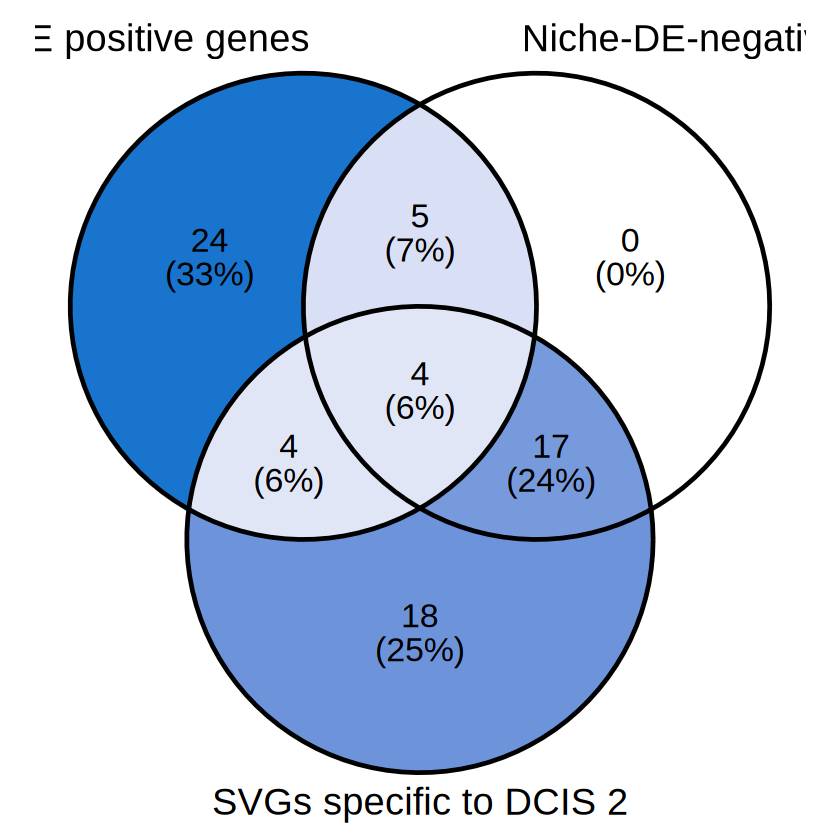

In [13]:
library(ggVennDiagram)
celltype <- "DCIS 2"
svg_list <- list(niche_genes_T, niche_genes_F, rownames(sig_genes_list[[celltype]]))
name_list <- c(
    "Niche-DE positive genes", "Niche-DE-negative genes",
    paste0("SVGs specific to ", celltype)
)
p <- ggVennDiagram(svg_list, name_list, set_size = 8, label_size = 7, label_alpha = 0) +
    scale_fill_gradient(low = "white", high = "dodgerblue3") +
    # scale_fill_distiller(palette = "RdBu") +
    theme(
        text = element_text(size = 32),
        title = element_text(size = 24),
        legend.position = "none"
    )
ggsave(
    filename = file.path(RESULT_PATH, seg_method, "niche_DE_genes_venn.pdf"),
    plot = p, width = 10, height = 6
)
p